W celu otrzymania wyników należy odpalić linijkę kodu poniżej: 

In [ ]:
%run exec.py

Skrypt powininen wywołać AutoKerasa na każdym zbiorze z benchmarku oprócz 4 z którymi sobie nie daje rady. Wyniki dla każdego zbioru i każdego foldu zapisywane są w pliku *result.json* wraz z czasem wykonania.
Ponieżej w celu pokazania wyników wczytywane są pliki z wynikami z folderów o nazwach odpowiadających wykorzystanym ustawieniom

In [482]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

In [442]:
dirs = ['default','trials10','trials10_epochs100','trials20']

In [443]:
def open_results(dir_names):
    df = pd.DataFrame(columns = ["dataset","avg_auc","min_auc","max_auc","time","model"])
    for dir_name in dir_names:
        with open(dir_name+"/results.json","r") as f:
            loaded = json.load(f)

        for name in list(loaded.keys()):
            row = pd.Series([name,
                   np.mean(loaded[name]["scores"]['auc']),
                   np.min(loaded[name]["scores"]['auc']),
                   np.max(loaded[name]["scores"]['auc']),
                   loaded[name]["time"]/60,
                   dir_name
                  ], index=df.columns)
            df = df.append(row,ignore_index=True)
    return df

In [444]:
results = open_results(dirs)

In [445]:
results

,dataset,avg_auc,min_auc,max_auc,time,model
0,kr-vs-kp,0.501502,0.5,0.507508,48.184733,default
1,credit-g,0.525709,0.463818,0.651356,46.396665,default
2,kc1,0.527127,0.498575,0.600698,95.577176,default
3,adult,0.701185,0.679403,0.713073,100.65754,default
4,blood-transfusion-service-center,0.482389,0.358316,0.566327,28.655981,default
...,...,...,...,...,...,...
60,jasmine,0.748093,0.725707,0.774997,12.906906,trials20
61,sylvine,0.808816,0.762779,0.8335,0.601455,trials20
62,airlines,0.583912,0.58166,0.587175,6.334613,trials20
63,nomao,0.883098,0.875075,0.892002,17.912447,trials20


In [476]:
def make_plots(name,df,ax1,ax2):
    
    if df.shape[0] == 3:
        row = pd.Series([name,0,0,0,0,'default'], index=df.columns)
        df = df.append(row,ignore_index=True)
    
    df = df.sort_values(by = 'model', ascending = False)
    
    ax2.hlines(y = df["model"], xmin = df["min_auc"], xmax = df["max_auc"],colors = ['r','m','c','g']) 
    ax2.scatter(y = df["model"], x = df["min_auc"], alpha = 1,zorder=2, marker = '|',color = ['r','m','c','g'])
    ax2.scatter(y = df["model"], x = df["max_auc"], alpha = 1,zorder=2, marker = '|',color = ['r','m','c','g'])
    ax2.scatter(y = df["model"], x = df["avg_auc"], alpha = 1,zorder=2, color = ['r','m','c','g'])


    ax1.hlines(y = df["model"], xmin = 0, xmax = df["time"],colors = ['r','m','c','g']) 
    ax1.scatter(y = df["model"], x = df["time"], alpha = 1,zorder=2, color = ['r','m','c','g'])
    ax1.invert_xaxis()
    ax1.invert_yaxis()

    # ax1.set_xlim(1.1 *np.max(df['time']),0)

    xticks = np.linspace(0, 1, num=6, dtype=float).tolist()

    ax2.tick_params(axis="x", bottom=True,  labelbottom=True, length=0)
    ax2.set_xticks(xticks)
    ax2.invert_yaxis()

    ax1.xaxis.grid()
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set(yticks=[])

    ax2.xaxis.grid()
    ax2.spines['top'].set_visible(False)

    ax2.spines['bottom'].set_visible(False)
    ax2.set(yticks=[])
    
    ax1.set_ylim(-0.45,3.45)
    ax2.set_ylim(-0.45,3.45)
    
    ax1.set_title(name,fontsize=16, loc = 'left', pad = 10)
    

    
    
    

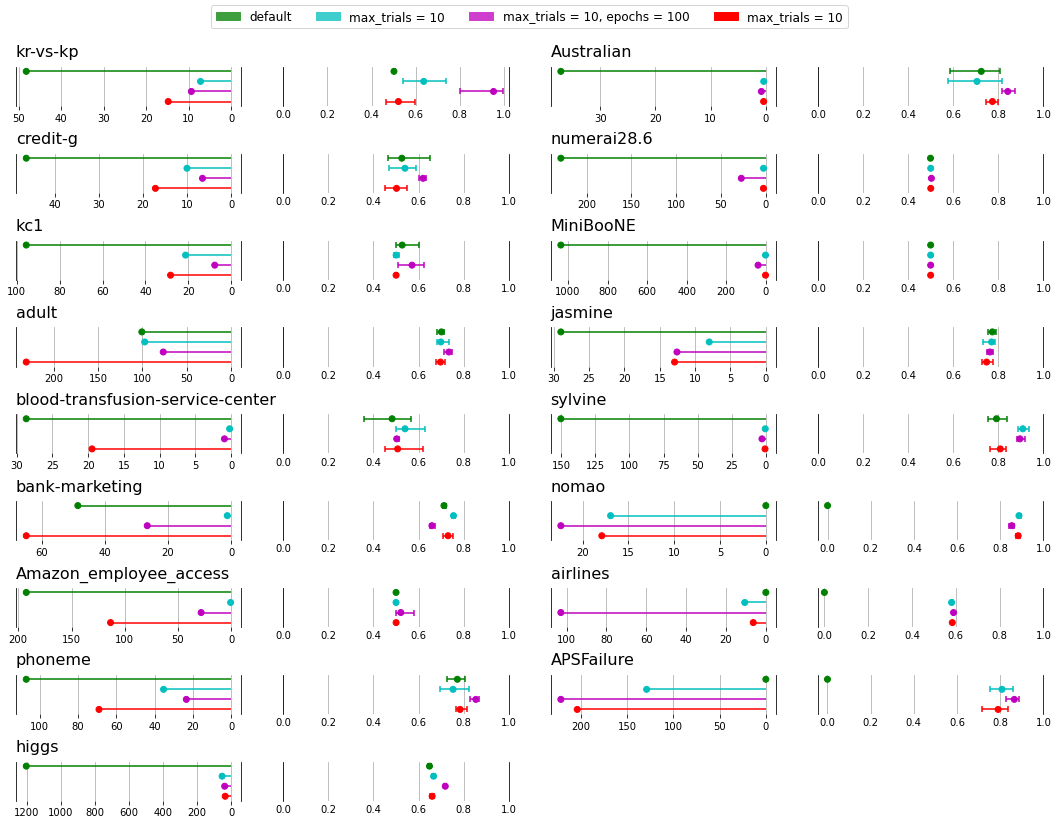

In [506]:
rows, cols = (9,2)

fig, axes = plt.subplots(rows,2*cols,figsize = [15,11.5])
fig.tight_layout(h_pad=3.0)

for name,i, in zip(results.dataset.unique(),range(0,axes.size,2)):
    # print(name,i)
    df = results[results["dataset"] == name]
    row = (i%(2*rows))//2
    col = (i//(2*rows)) * 2
    make_plots(name,df,axes[row][col],axes[row][col+1]) 

row +=1


axes[row][col].axis('off');
axes[row][col+1].axis('off');

red_patch = mpatches.Patch(color='#FF0000', label='max_trials = 10')
magenta_patch = mpatches.Patch(color = '#CE3FCE', label = 'max_trials = 10, epochs = 100')
green_patch = mpatches.Patch(color = '#3F9F3F', label = 'default')
cyan_patch = mpatches.Patch(color = '#3FCECE', label = 'max_trials = 10')


fig.legend(handles=[green_patch, cyan_patch,magenta_patch,red_patch], loc = 'upper center', ncol = 4,prop={'size': 12})

fig.subplots_adjust(top = 0.92)

plt.savefig("plot.pdf", format="pdf", bbox_inches="tight")






In [513]:
df = results.groupby('model').mean().reset_index()

In [515]:
df

,model,avg_auc,min_auc,max_auc,time
0,default,0.618577,0.583351,0.654084,239.446123
1,trials10,0.661709,0.628491,0.696422,23.344317
2,trials10_epochs100,0.702671,0.678095,0.722096,38.142756
3,trials20,0.646556,0.621866,0.673088,49.422441


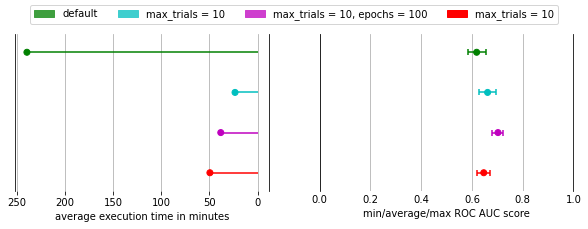

In [537]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [10,3])

df = df.sort_values(by = 'model', ascending = False)

ax2.hlines(y = df["model"], xmin = df["min_auc"], xmax = df["max_auc"],colors = ['r','m','c','g']) 
ax2.scatter(y = df["model"], x = df["min_auc"], alpha = 1,zorder=2, marker = '|',color = ['r','m','c','g'])
ax2.scatter(y = df["model"], x = df["max_auc"], alpha = 1,zorder=2, marker = '|',color = ['r','m','c','g'])
ax2.scatter(y = df["model"], x = df["avg_auc"], alpha = 1,zorder=2, color = ['r','m','c','g'])


ax1.hlines(y = df["model"], xmin = 0, xmax = df["time"],colors = ['r','m','c','g']) 
ax1.scatter(y = df["model"], x = df["time"], alpha = 1,zorder=2, color = ['r','m','c','g'])
ax1.invert_xaxis()
ax1.invert_yaxis()

xticks = np.linspace(0, 1, num=6, dtype=float).tolist()

ax2.tick_params(axis="x", bottom=True,  labelbottom=True, length=0)
ax2.set_xticks(xticks)
ax2.invert_yaxis()


ax1.xaxis.grid()
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set(yticks=[])

ax2.xaxis.grid()
ax2.spines['top'].set_visible(False)

ax2.spines['bottom'].set_visible(False)
ax2.set(yticks=[])

ax1.set_ylim(-0.45,3.45)
ax2.set_ylim(-0.45,3.45)

ax1.set_xlabel("average execution time in minutes")
ax2.set_xlabel("min/average/max ROC AUC score")

red_patch = mpatches.Patch(color='#FF0000', label='max_trials = 10')
magenta_patch = mpatches.Patch(color = '#CE3FCE', label = 'max_trials = 10, epochs = 100')
green_patch = mpatches.Patch(color = '#3F9F3F', label = 'default')
cyan_patch = mpatches.Patch(color = '#3FCECE', label = 'max_trials = 10')


fig.legend(handles=[green_patch, cyan_patch,magenta_patch,red_patch], loc = 'upper center', ncol = 4,prop={'size': 10})

fig.subplots_adjust(top = 0.85)

plt.savefig("plot2.pdf", format="pdf", bbox_inches="tight")


